In [ ]:
#Importing relevent Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from wordcloud import WordCloud
import nltk
from textblob import TextBlob
import datetime
from collections import Counter
import re

In [ ]:
# Load the datasets (update the file paths as necessary)
rental_price_data = pd.read_csv('Canadian housing rental price.csv')
housing_supply_data = pd.read_csv('Canadian_housing_supply.csv')


## **N-gram analyses**

In [ ]:
# !python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# Apply NLP to each tweet
docs = housing_supply_data['Tweets'].apply(nlp)

word_frequencies = Counter()

for doc in docs:
    for token in doc:
        # Process words that are not stop words, punctuation, or whitespace
        if not token.is_stop and not token.is_punct and not token.is_space:
            word_frequencies[token.text.lower()] += 1  # Using lower case for consistency


In [ ]:
# Create a DataFrame from the word frequencies
df = pd.DataFrame(word_frequencies.items(), columns=['Word', 'Frequency'])

# Sort by frequency and filter
df_filtered = df.query("Frequency >= 25").sort_values(by='Frequency', ascending=False)

# Display the top 10 words
df_filtered.head(10)

,Word,Frequency
6,housing,3534
3,supply,2655
29,canadians,1408
89,canadian,1176
44,problem,719
37,homes,684
27,+,588
4,demand,585
33,crisis,560
79,canada,450


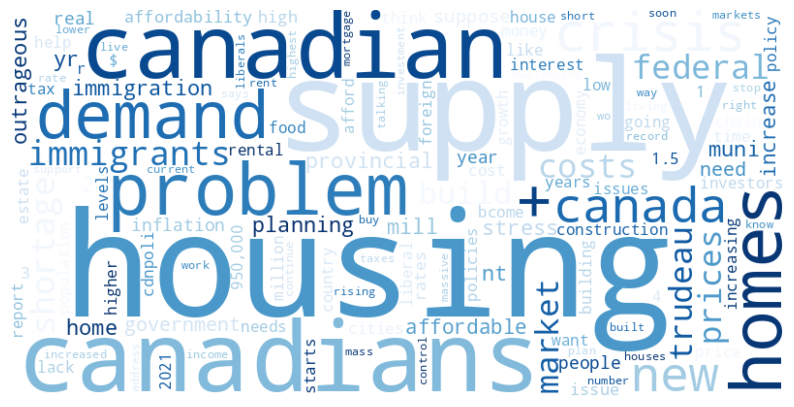

In [ ]:
# Generate a word cloud from the filtered words
word_dict = dict(zip(df_filtered['Word'], df_filtered['Frequency']))
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_font_size=150, min_font_size=10).generate_from_frequencies(word_dict)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

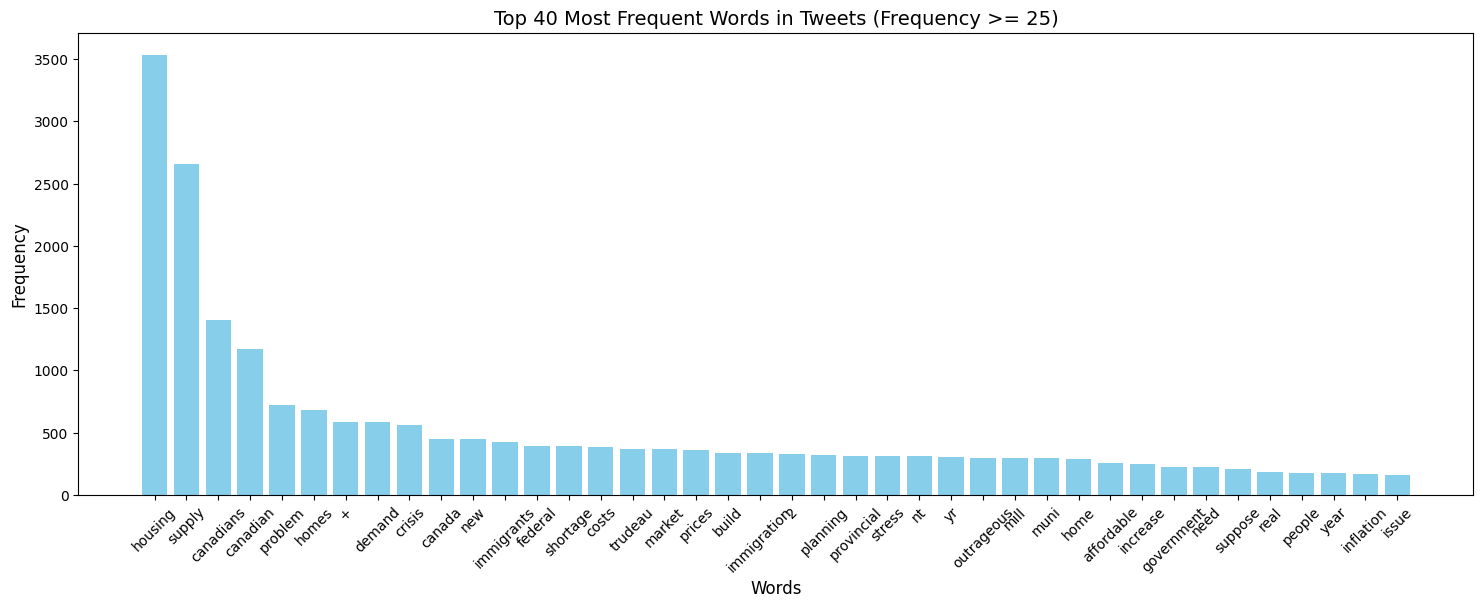

In [ ]:
# Create a bar plot for the top N most frequent words
top_n = 40
top_words = df_filtered.head(top_n)

plt.figure(figsize=(18, 6))
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.title('Top 40 Most Frequent Words in Tweets (Frequency >= 25)', fontsize=14)
plt.show()

# **Sentiment Analysis**

In [ ]:
all_tweets = ' '.join(housing_supply_data['Tweets'].tolist())


In [ ]:
# Tokenization
nltk.download('punkt')
sentences = nltk.sent_tokenize(all_tweets)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
polarity_scores = []

for sentence in sentences:
    blob = TextBlob(sentence)
    polarity = blob.sentiment.polarity
    polarity_scores.append(polarity)

print("Average polarity score:", np.mean(polarity_scores))

Average polarity score: 0.036006492037790286


The average polarity score of 0.036 for the Canadian housing supply data from Twitter, which is slightly positive but predominantly neutral, can be interpreted in several ways in the context of public opinion and sentiment analysis:

**Predominantly Neutral Sentiment:** The score is very close to zero, which suggests that the overall sentiment in the tweets is largely neutral. This could mean that the majority of the tweets are either factual, lacking strong emotional content, or contain a balanced mix of both positive and negative sentiments that cancel each other out.

**Slight Positive Bias:** The positive value, even though small, indicates a slight leaning towards positive sentiment. This could suggest that there is a marginally more positive than negative view among the tweets about the Canadian housing supply. However, this positivity is very subtle.

**Public Perception:** In the context of Canadian housing supply, this score might reflect a public perception that is cautiously optimistic or somewhat content with the current state, but not overwhelmingly so. It could also indicate a general acceptance or resignation regarding the housing situation.

**Contextual Considerations:** The interpretation of this score should consider the broader context of the data. For instance, if these tweets were collected during a specific event or announcement related to housing, the score might reflect public reaction to that specific context.

**Data Representation:** This score represents an average sentiment and may not capture the diversity of opinions within the tweets. Individual tweets might have strongly positive or negative sentiments, but when averaged, they present a more neutral outlook.

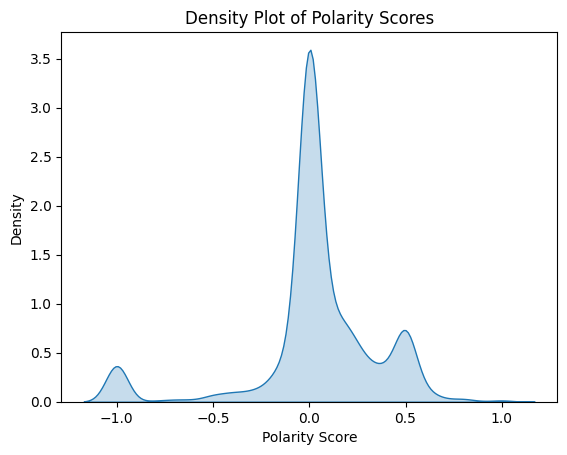

In [ ]:
sns.kdeplot(polarity_scores, fill=True)
plt.xlabel('Polarity Score')
plt.ylabel('Density')
plt.title('Density Plot of Polarity Scores')
plt.show()


# **Subjective Score**

Subjectivity refers to the degree of personal feelings, emotions, or opinions reflected
in a text. It is measured on a scale ranging from 0 to 1, where 0 indicates that a text
is very objective and based purely on facts, and 1 indicates that a text is very
subjective and based purely on personal opinions. For example, a news article reporting
on a political event might have a low subjectivity score, while a personal blog post
expressing opinions about the same event might have a higher subjectivity score.

In [ ]:
# Subjective Score
subjectivity_scores = []

for sentence in sentences:
    blob = TextBlob(sentence)
    subjectivity = blob.sentiment.subjectivity
    subjectivity_scores.append(subjectivity)

print("Average subjectivity score:", np.mean(subjectivity_scores))

Average subjectivity score: 0.32463035461523176


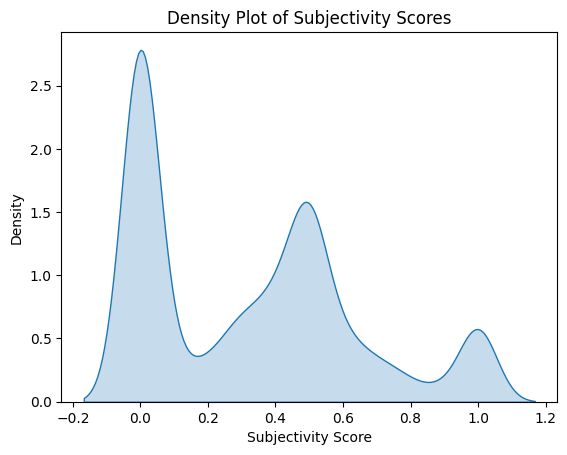

In [ ]:
sns.kdeplot(subjectivity_scores, fill=True)
plt.xlabel('Subjectivity Score')
plt.ylabel('Density')
plt.title('Density Plot of Subjectivity Scores')
plt.show()
